### Customer Churn with Logistic Regression

### Importing Libraries

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from IPython.display import Image

from sklearn.model_selection import train_test_split
%matplotlib inline

#Setting the palette
sns.set_style('darkgrid')
sns.set_palette("Set3", 9)

In [3]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

#https://medium.com/@ODSC/properly-setting-the-random-seed-in-ml-experiments-not-as-simple-as-you-might-imagine-219969c84752

Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will churn so at to take appropriate measures.

In [86]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

### Checking unique values in the Dataset

In [10]:
# Printing the unique values if it is less than 10 otherwise just the count of unique values

for column in df:
    unique_values = np.unique(df[column])
    unique_no = len(unique_values)
    
    if unique_no < 10:
        print('The number of unique values for feature {} is {} -- {}'.format(column, unique_no, unique_values))
    else:
        print('The range for the feature {} is {} -- {}'.format(column, min(df[column]), max(df[column])))

The range for the feature customerID is 0002-ORFBO -- 9995-HOTOH
The number of unique values for feature gender is 2 -- ['Female' 'Male']
The number of unique values for feature SeniorCitizen is 2 -- [0 1]
The number of unique values for feature Partner is 2 -- ['No' 'Yes']
The number of unique values for feature Dependents is 2 -- ['No' 'Yes']
The range for the feature tenure is 0 -- 72
The number of unique values for feature PhoneService is 2 -- ['No' 'Yes']
The number of unique values for feature MultipleLines is 3 -- ['No' 'No phone service' 'Yes']
The number of unique values for feature InternetService is 3 -- ['DSL' 'Fiber optic' 'No']
The number of unique values for feature OnlineSecurity is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature OnlineBackup is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature DeviceProtection is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature TechSupport is 3

## Data Cleaning 

### Checking Missing Values

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b>We have no missing values</b>

### Proper Formating of Data

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# Total Charges is stored as string.
df['TotalCharges'].head()


0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [14]:
# Converting TotalCharges to proper Data Type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') # Coverts the total Charges to float and the ones that couldn't covert are converted to null values

In [15]:
# Dropping the newly created null Values
print(df.isnull().sum())

df = df.dropna()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Exploratory Data Analysis

#### Plotting Histogram for Numerical Variable and Count plot for categorical Variable

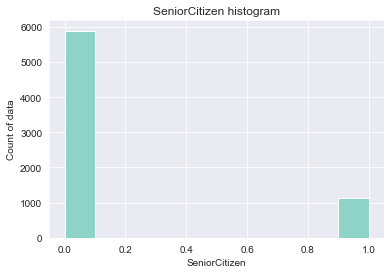

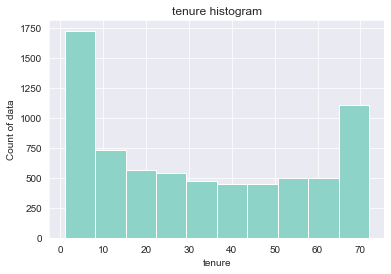

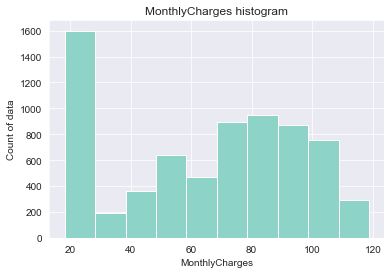

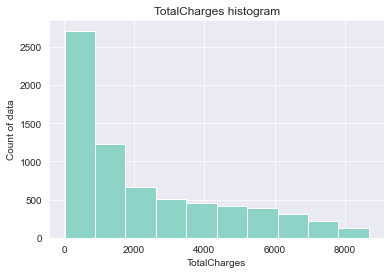

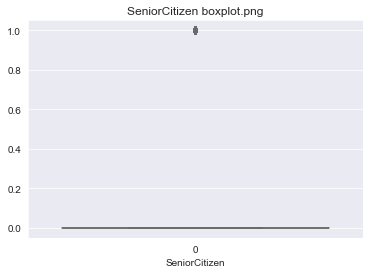

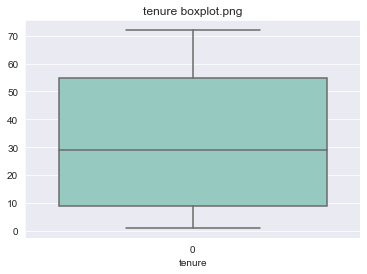

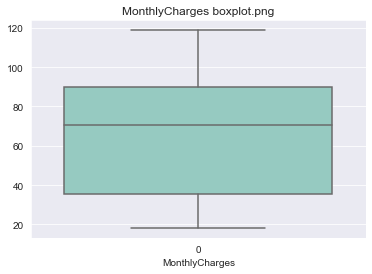

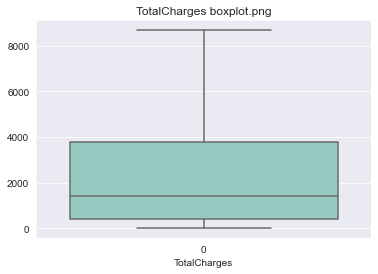

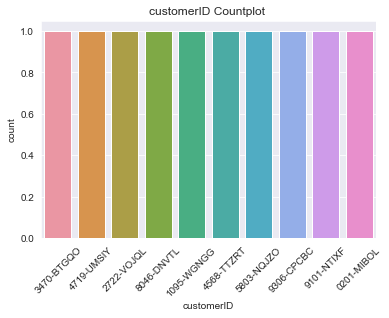

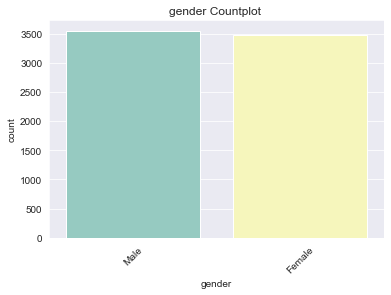

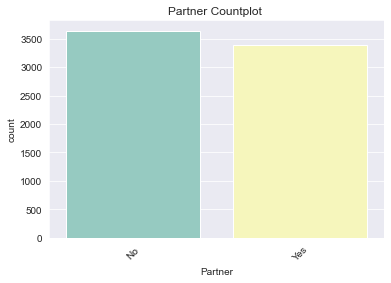

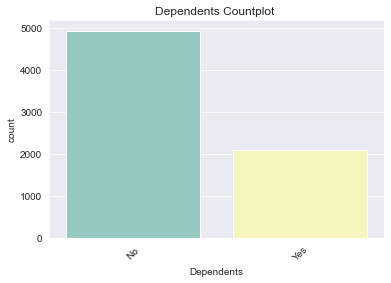

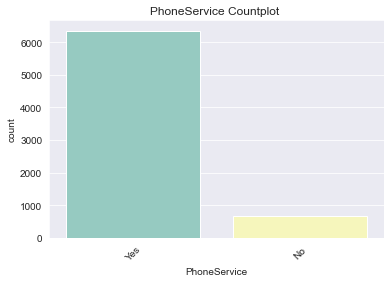

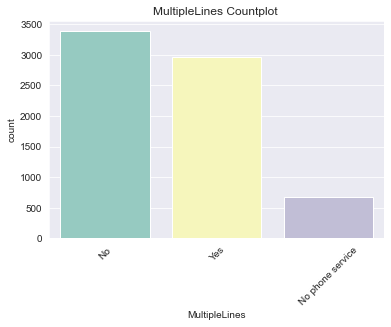

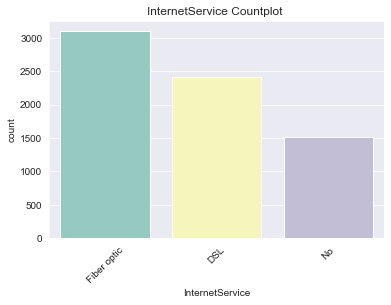

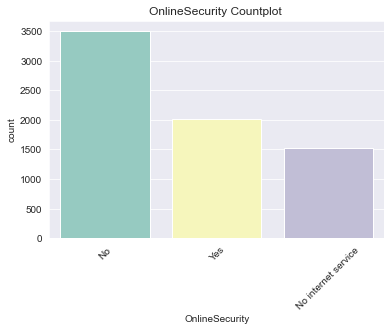

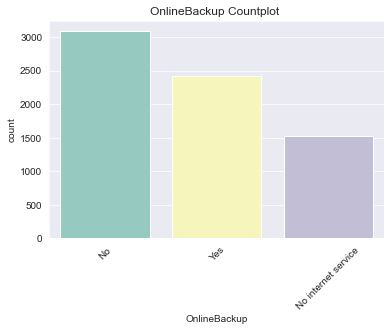

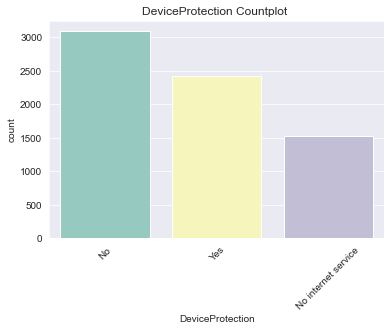

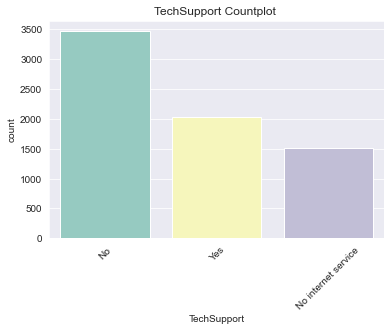

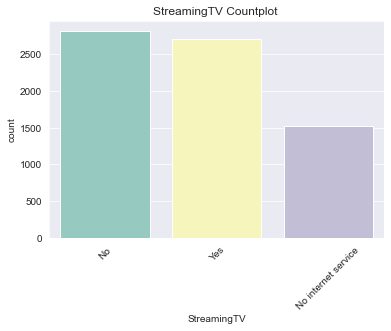

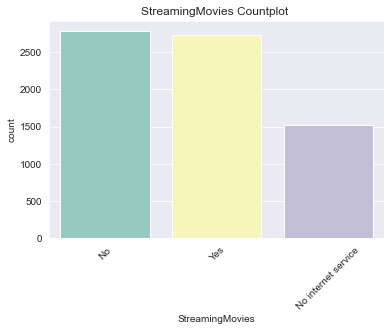

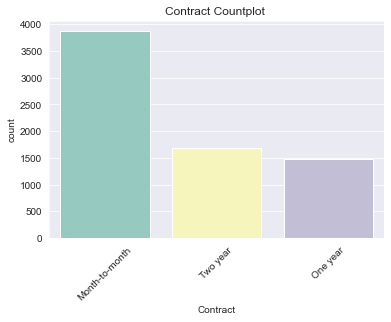

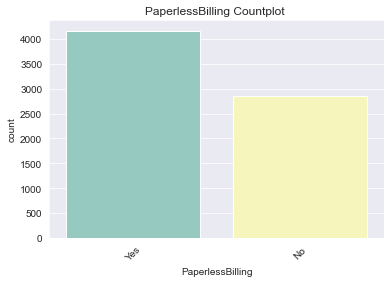

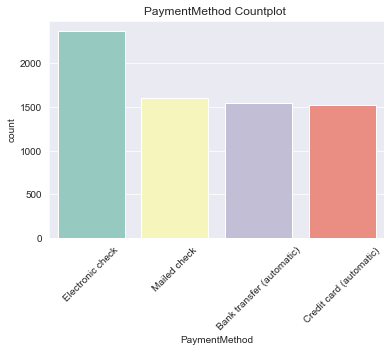

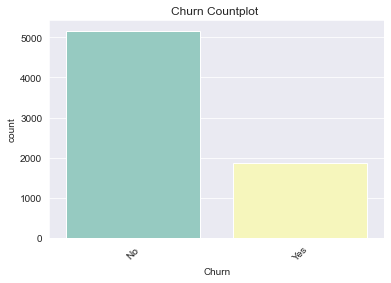

In [17]:
def graphs(dataframe):
    inttype = []
    objecttype = []
    for column in dataframe:
        columnObjectSeries = dataframe[column]
        if (columnObjectSeries.dtypes == 'int64') or (columnObjectSeries.dtypes == 'float64') :
            inttype.append(column)
        elif columnObjectSeries.dtypes == 'object':
            objecttype.append(column)
    
    numerical = dataframe[inttype] # New dataframe of numerical data
    categorical = dataframe[objecttype] # New dataframe of object type data
    
# Plotting Histogram for Numerical data    
    for column in numerical:
        plt.hist(numerical[column])
        plt.xlabel(column)
        plt.ylabel('Count of data')
        plt.title('{} histogram'.format(column))
        #plt.savefig('{} histogram.png'.format(column))
        plt.show()
        
# Plotting box plot for Numerical data
    for column in numerical:
        sns.boxplot(data = numerical[column])
        #plt.savefig('{} boxplot.png'.format(column))
        plt.xlabel(column)
        plt.title('{} boxplot.png'.format(column))
        plt.show()
    
# Plotting bar chart for all categorical data
    for column in categorical:
            sns.countplot(data = categorical, x = column, order=pd.value_counts(dataframe[column]).iloc[:10].index)
            plt.xticks(rotation=45)
            plt.xlabel(column)
            plt.title("{} Countplot ".format(column))
            #plt.savefig('{} countplot.png'.format(column))
            plt.show()

graphs(df)


### Churn 

<AxesSubplot:xlabel='Churn', ylabel='count'>

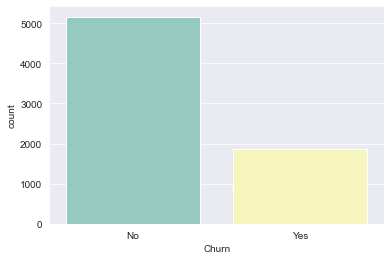

In [18]:
sns.countplot(data = df, x = 'Churn')

In [19]:
print('Churn Rate is ', round(len(df[df['Churn'] == 'Yes']) * 100 / len(df),2), '%')

# If the imbalancing is in the ratio less that or equal to 1:10, sampling is required.

Churn Rate is  26.58 %


Dataset is Mildly imbalanced, try sampling method after the analysis to see if score increases.

## Analysis with respect to Churn

In [20]:
num_feature = ['tenure','MonthlyCharges', 'TotalCharges'] 

cat_feature = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

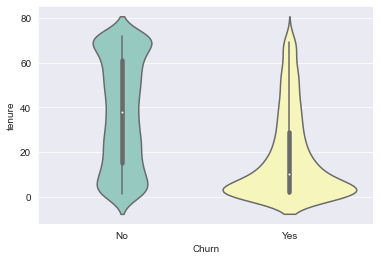

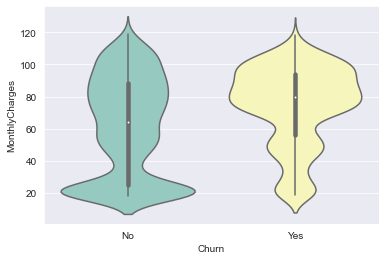

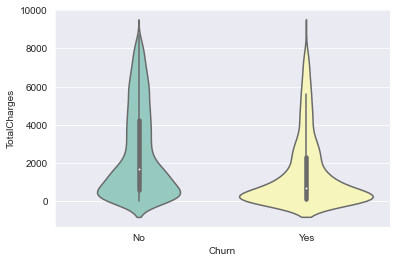

In [21]:
for col in num_feature:
    sns.violinplot(data = df, x = 'Churn', y = col)
    plt.show()

### Insights:

   - <b>Tenure</b> of churned customers is skewed to short tenure duration and relatively shorter to non-churn customers, whereas the tenure of non-churn customers is more uniformly distributed. This makes sense since customer will be early to churn if they feel the product is not right fit for them and they will churn in their early customer lifecycle.
   - Interestingly, <b>Monthly Charges</b> of churn customers are relatively higher than non-churn customers.
   - The <b>Total Charges</b> of lower for churn customers as over a period of time they have left early hence haven't contributed to the charges like the non-churn customers

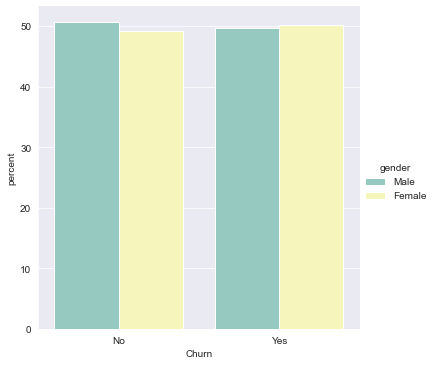

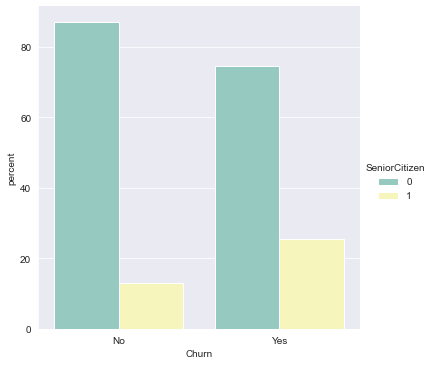

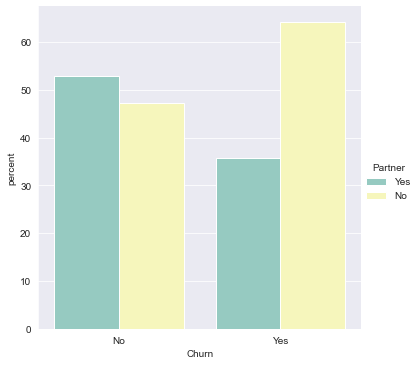

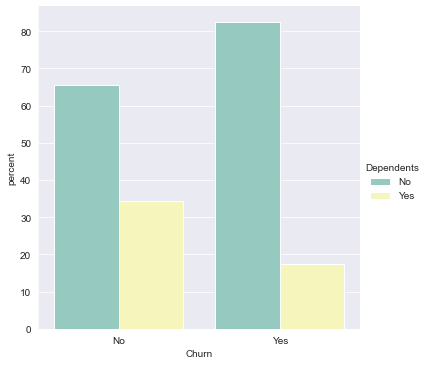

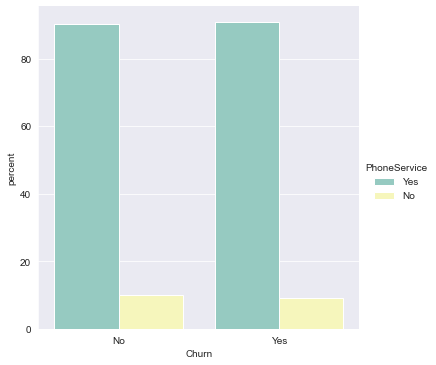

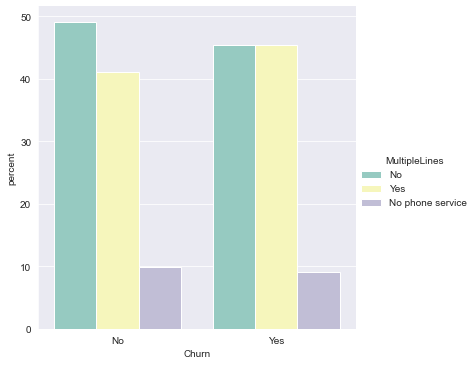

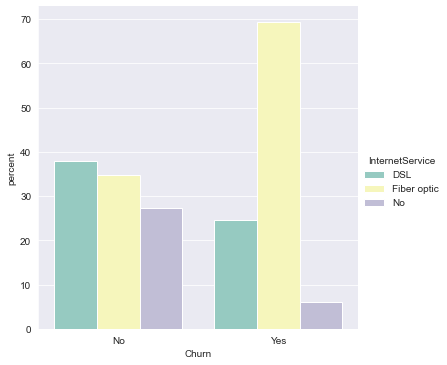

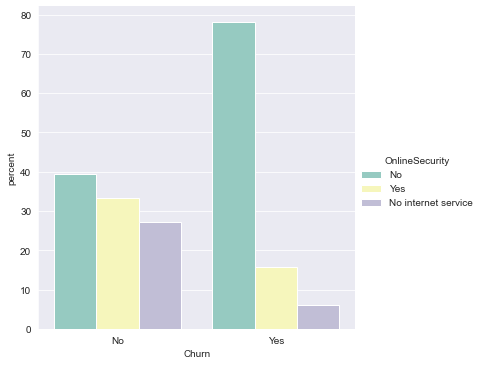

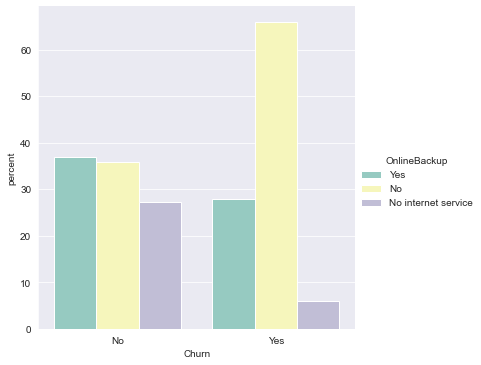

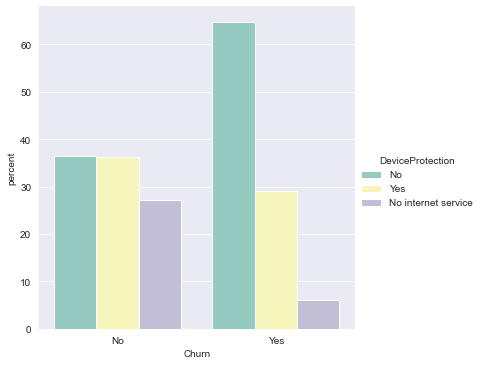

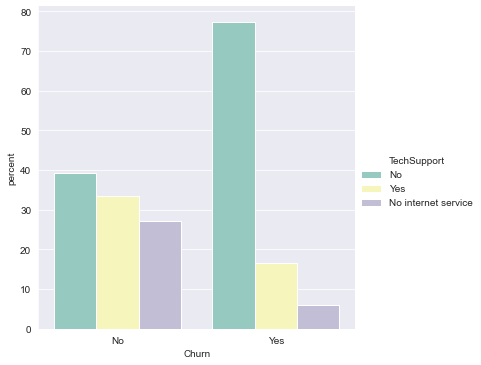

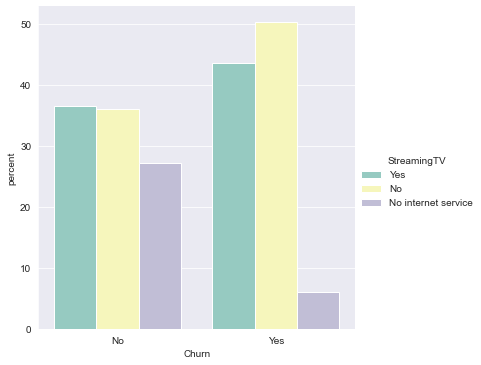

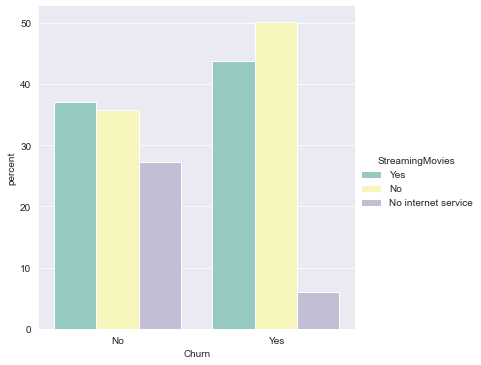

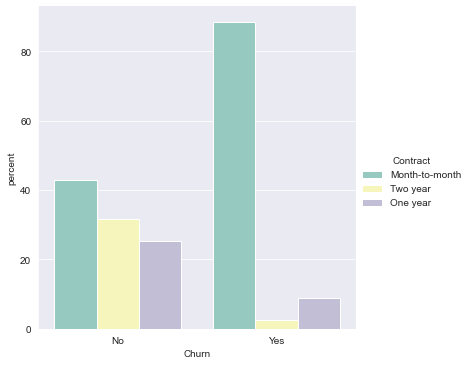

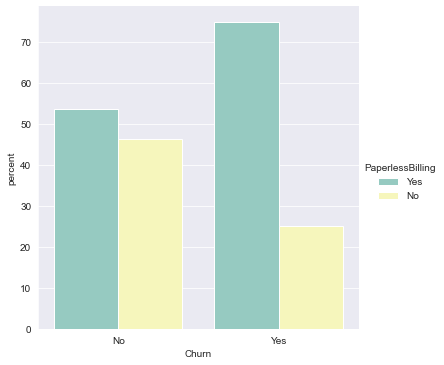

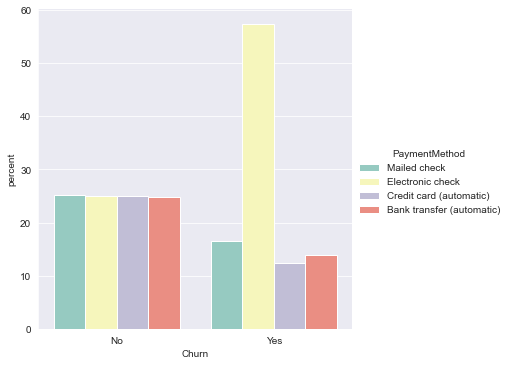

In [22]:
for col in cat_feature:

    (df
    .groupby('Churn')[col]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x='Churn',y='percent',hue= col ,kind='bar'))

    plt.show()

#### Inference:
The feature Gender seems to have no significant effect on the churn.

### Checking unique values in the Dataset

In [23]:
# Printing the unique values if it is less than 10 otherwise just the count of unique values

for column in df:
    unique_values = np.unique(df[column])
    unique_no = len(unique_values)
    
    if unique_no < 10:
        print('The number of unique values for feature {} is {} -- {}'.format(column, unique_no, unique_values))
    else:
        print('The range for the feature {} is {} -- {}'.format(column, min(df[column]), max(df[column])))

The range for the feature customerID is 0002-ORFBO -- 9995-HOTOH
The number of unique values for feature gender is 2 -- ['Female' 'Male']
The number of unique values for feature SeniorCitizen is 2 -- [0 1]
The number of unique values for feature Partner is 2 -- ['No' 'Yes']
The number of unique values for feature Dependents is 2 -- ['No' 'Yes']
The range for the feature tenure is 1 -- 72
The number of unique values for feature PhoneService is 2 -- ['No' 'Yes']
The number of unique values for feature MultipleLines is 3 -- ['No' 'No phone service' 'Yes']
The number of unique values for feature InternetService is 3 -- ['DSL' 'Fiber optic' 'No']
The number of unique values for feature OnlineSecurity is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature OnlineBackup is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature DeviceProtection is 3 -- ['No' 'No internet service' 'Yes']
The number of unique values for feature TechSupport is 3

## Feature Selection (Basics)

It's not necessary that all the given features are going to help predict customer churn. In our case customer id and gender are those feature which will not add any value to our analysis

- Removed Customer ID (df1)
- Removed Gender as shown from EDA (df1)

In [59]:
# Dropping CustomerID and Gender

df1 = df.drop(['customerID', 'gender'], axis = 'columns')


df1.shape

(7032, 19)

## Feature Encoding

#### Things we can try out:

   1. First let's impute the Churn to 0 and 1 (df1)
   2. Let's simply try one hot encoding for rest of the categorical variable and calculated the model performance for that. (df2)
   - Later we can try substituting the values of 'No x services' with 'No'
   - We can also try by giving each variable a scoring based on personal judgement

#### For now lets simply try  Churn Coversion (df1) and on top of that one hot encoding (df2) 

In [60]:
# Converting Churn to Numeric
df1['Churn'].replace({'Yes': 1, "No": 0}, inplace = True)


In [61]:
# Creating Dummy Variables for the features
df2 = pd.get_dummies(data = df1)

print(f'We have added {df2.shape[1] - df1.shape[1]} more columns to our list. New shape: {df2.shape} ')
df2.sample(5)

We have added 25 more columns to our list. New shape: (7032, 44) 


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  Partner_No  \
3221              0       3           29.75         96.85      0           1   
4327              0       7           69.90        497.30      0           1   
5946              0      42           73.90       3160.55      1           1   
2254              1      72           93.05       6735.05      0           0   
2995              0       1           25.25         25.25      0           1   

      Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  ...  \
3221            0              1               0                1  ...   
4327            0              1               0                0  ...   
5946            0              1               0                0  ...   
2254            1              1               0                0  ...   
2995            0              1               0                1  ...   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
3221                    0                        1                  0   
4327                    0                        1                  0   
5946                    1                        0                  1   
2254                    0                        0                  0   
2995                    0                        1                  0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
3221                  0                    0                     1   
4327                  0                    0                     1   
5946                  0                    1                     0   
2254                  1                    0                     1   
2995                  0                    1                     0   

      PaymentMethod_Bank transfer (automatic)  \
3221                                        0   
4327                                        0   
5946                                        0   
2254                                        1   
2995                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
3221                                      0                               1   
4327                                      0                               0   
5946                                      1                               0   
2254                                      0                               0   
2995                                      0                               0   

      PaymentMethod_Mailed check  
3221                           0  
4327                           1  
5946                           0  
2254                           0  
2995                           0  

[5 rows x 44 columns]

## Feature Selection 2

- Later we can also try Recursive Feature Elimination
- Use Chi Squared Contengency table



## Tree-based feature selection

Steps:
- Split the data into X and y
- Run a Tree-based estimators (i.e. decision trees and random forests)
- Run Feature Importance

In [62]:
# Split the data into vectors of X and y for decision Tree

X = df2.drop(['Churn'], axis = 'columns').values

y = df2['Churn']

In [63]:
X

array([[  0.  ,   1.  ,  29.85, ...,   0.  ,   1.  ,   0.  ],
       [  0.  ,  34.  ,  56.95, ...,   0.  ,   0.  ,   1.  ],
       [  0.  ,   2.  ,  53.85, ...,   0.  ,   0.  ,   1.  ],
       ...,
       [  0.  ,  11.  ,  29.6 , ...,   0.  ,   1.  ,   0.  ],
       [  1.  ,   4.  ,  74.4 , ...,   0.  ,   0.  ,   1.  ],
       [  0.  ,  66.  , 105.65, ...,   0.  ,   0.  ,   0.  ]])

In [64]:
# Decision Tree based Feature selection
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier().fit(X,y)

# Fixing the random state so as to keep the seed constant and try out different Hyper tuning parameters
# Criterion: Gini (Default) and entropy, gives more or less same value but entropy takes longer time for computation
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [65]:
# Running Feature Importance

fi_col = []
fi = []

for i, column in enumerate(df2.drop('Churn', axis = 'columns')):
    print('The feature importance for {} : {}'.format(column, decision_tree.feature_importances_[i]))
    fi_col.append(column)
    fi.append( decision_tree.feature_importances_[i])

The feature importance for SeniorCitizen : 0.014992783604584448
The feature importance for tenure : 0.12337084343771404
The feature importance for MonthlyCharges : 0.19222194876774212
The feature importance for TotalCharges : 0.20568865185456958
The feature importance for Partner_No : 0.010239015313283023
The feature importance for Partner_Yes : 0.012119666734307373
The feature importance for Dependents_No : 0.008898589529404236
The feature importance for Dependents_Yes : 0.010184699927643068
The feature importance for PhoneService_No : 0.0038982629638167512
The feature importance for PhoneService_Yes : 0.001412257743588551
The feature importance for MultipleLines_No : 0.006930782547257124
The feature importance for MultipleLines_No phone service : 0.00021039135083353238
The feature importance for MultipleLines_Yes : 0.007658357899341855
The feature importance for InternetService_DSL : 0.0004902989930693599
The feature importance for InternetService_Fiber optic : 0.04912180864619807
Th

In [66]:
# Creating Feature Importance Dataframe

fi_df = zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df, columns = ['Features', 'Feature Importance'])
fi_df = fi_df.sort_values('Feature Importance', ascending=False, ignore_index = True)
print(fi_df)

col_to_keep = fi_df['Features'][fi_df['Feature Importance'] > 0]

print(col_to_keep.shape)

                                   Features  Feature Importance
0                              TotalCharges            0.205689
1                            MonthlyCharges            0.192222
2                   Contract_Month-to-month            0.165181
3                                    tenure            0.123371
4               InternetService_Fiber optic            0.049122
5                            TechSupport_No            0.018648
6                PaymentMethod_Mailed check            0.015286
7                             SeniorCitizen            0.014993
8            PaymentMethod_Electronic check            0.014455
9                       PaperlessBilling_No            0.012191
10                              Partner_Yes            0.012120
11    PaymentMethod_Credit card (automatic)            0.011775
12                          OnlineBackup_No            0.011486
13  PaymentMethod_Bank transfer (automatic)            0.011440
14                        OnlineSecurity

## Feature Scaling and Normalization

As the models we are going to use like logistic regression and decision trees, do not require scaling. Hence we won't be performing any type of scaling

## Train Test Validation Split

We are going to split the dataset into training and testing dataset. (60% : 20%: 20%)

https://machinelearningmastery.com/difference-test-validation-datasets/

In [67]:
# Create numpy array X without label column 'Churn'
X = df2[col_to_keep].values
print(X.shape)

# Create label vector/np array y
y = df2['Churn'].values
y


(7032, 35)


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [68]:
# Train, Test, Validation Split

# Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, test_size = 0.2 )

# Train - Validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.8, test_size = 0.2)



print(f'X_training shape: {X_train.shape}, y_train shape: {y_train.shape} \n' )
print(f'X_validation shape: {X_valid.shape}, y_validation shape: {y_valid.shape}')
print(f'X_testing shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_training shape: (4500, 35), y_train shape: (4500,) 

X_validation shape: (1125, 35), y_validation shape: (1125,)
X_testing shape: (1407, 35), y_test shape: (1407,)


<AxesSubplot:ylabel='count'>

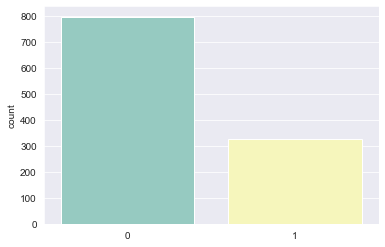

In [69]:
# Investing the distribution of ys
sns.countplot(x = y_valid)

## Logistic Regression

In [70]:
# Image('https://cdn-images-1.medium.com/max/800/1*ZQHJknrG3ByEkqZpErlDRw.pnghttps://scikit-learn.org/stable/_images/sphx_glr_plot_face_recognition_001.png')

In [76]:
# Training the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear') # liblinear is better for small dataset

log_reg.fit(X_train, y_train)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LogisticRegression(solver='liblinear')

In [89]:
# Methods we can use in Logistic Regression

# Predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)
y_valid_prediction = log_reg.predict(X_valid)

# Predict_prob - Probability estimates
pred_prob = log_reg.predict_proba(X_train) # Gives prob of [0 , 1]
y_valid_prediction_prob = log_reg.predict_proba(X_valid)
# coef_ - Coefficient of the features in the decision Function
log_reg.coef_

array([[ 1.87245892e-04,  9.27339445e-03,  1.32721480e+00,
        -4.70192848e-02,  3.75779304e-01,  2.49949606e-01,
        -1.36622701e-01,  1.53866029e-01,  9.31934822e-02,
        -5.60718914e-01, -3.33703633e-01, -3.98468521e-01,
         1.71450305e-01, -2.33235413e-01,  3.38041747e-01,
        -3.41429520e-01, -3.83497280e-01, -2.15286906e-02,
        -5.81554545e-02,  1.31740475e-01, -2.91635873e-01,
        -1.14414239e-01, -4.58331697e-02, -1.97897252e-01,
        -1.84456237e-02, -1.36654755e-01, -3.91976203e-01,
        -2.24746896e-01,  1.34823541e-01,  1.59128021e-01,
         5.26017082e-01, -8.52596976e-02, -5.89873455e-01,
        -2.62484453e-01, -8.52596976e-02]])

C:\Users\Chief\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

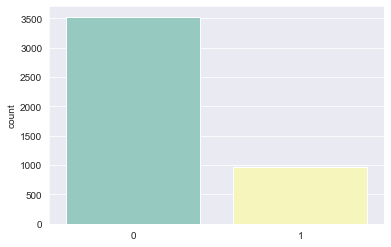

In [78]:
sns.countplot(y_pred)

## Evaluating the Model

In [79]:
# Accuracy of training Dataset
print("The accuracy of the training model: ", log_reg.score(X_train, y_train))

# Accuracy of the Validation Dataset
print("The accuracy of the validation dataset: ", log_reg.score(X_valid, y_valid))

# Classification Report for training Dataset
from sklearn.metrics import classification_report
print('\n',classification_report(y_train, y_pred))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

The accuracy of the training model:  0.8115555555555556
The accuracy of the validation dataset:  0.7964444444444444

               precision    recall  f1-score   support

           0       0.85      0.90      0.88      3337
           1       0.66      0.55      0.60      1163

    accuracy                           0.81      4500
   macro avg       0.76      0.73      0.74      4500
weighted avg       0.80      0.81      0.81      4500



In [80]:
# Classification Report for Validation Dataset

from sklearn.metrics import classification_report
print('\n',classification_report(y_valid, y_pred_valid))



               precision    recall  f1-score   support

           0       0.82      0.91      0.86       797
           1       0.70      0.52      0.60       328

    accuracy                           0.80      1125
   macro avg       0.76      0.72      0.73      1125
weighted avg       0.79      0.80      0.79      1125



The recall of the churn prediction looks pretty low, let's try and see if balancing the dataset would give better predictions

In [81]:
# Confusion Matrix of Validation Dataset

from sklearn.metrics import confusion_matrix

confusion_matrix(y_valid, y_pred_valid)

array([[725,  72],
       [157, 171]], dtype=int64)

### Logarithmic Loss / cross-entropy loss

- It is an error metric
- Comparing two models

In [85]:
from sklearn.metrics import log_loss

print('Log loss on validation data set is: ',log_loss(y_valid,y_pred_valid_prob))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#:~:text=Log%20loss%2C%20aka%20logistic%20loss,for%20its%20training%20data%20y_true%20.

Log loss on validation data set is:  0.4438566437433891


### R Squared Value

### ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.839


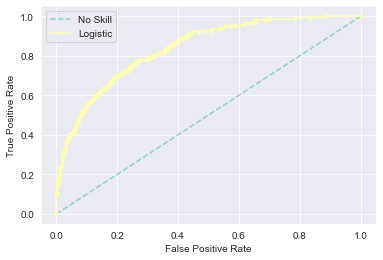

In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]


lr_probs = y_valid_prediction_prob
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Hyper Parameter Tuning

- We will loop over parameter C (inverse of regularization strength)
- Inverse of regularization strength helps to avoid overfitting - it penalizes large values of the parameters
- It also helps to find Global Minimum by moving better solution from Local Minimum to Global Minimum

## Modeling 

DataFrame:
- df1
    1. Removed Customer ID 
    2. Removed Gender as shown from EDA 
        Tried adding back the gender, though the validation accuracy increased by 1%
        the recall reduced by 2%
        Through it's feature importance wasn't zero
    3. Impute the Churn to 0 and 1
- df2
    1. One hot encoding
    2. Used Decision tree during spliting data (X) but have not applied to the        df2 dataframe
   